In [9]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.dates as matdates
plt.style.use('ggplot')
import math

In [10]:
#Reading
titanic_df = pd.read_csv('C:/Users/Rishi/Titanic/dataset.csv')

In [11]:
#Analyzing
print(titanic_df.head())
print(titanic_df.tail())
print(titanic_df.shape)
print(titanic_df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

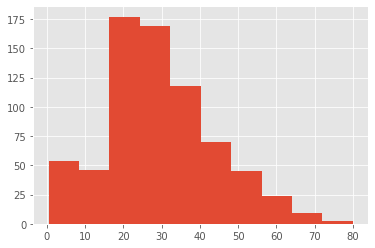

In [12]:
titanic_df['Age'].hist(bins=10)
def id(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [13]:
titanic_df['PersonID'] = titanic_df[['Age', 'Sex']].apply(id, axis =1) 
print(titanic_df.head()) 
print(titanic_df['PersonID'].value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked PersonID  
0      0         A/5 21171   7.2500   NaN        S     male  
1      0          PC 17599  71.2833   C85        C   female  
2      0  STON/O2. 3101282   7.9250   NaN        S   female  
3      0            113803  53.1000  C123        S   female  
4      0  

3    491
1    216
2    184
Name: Pclass, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


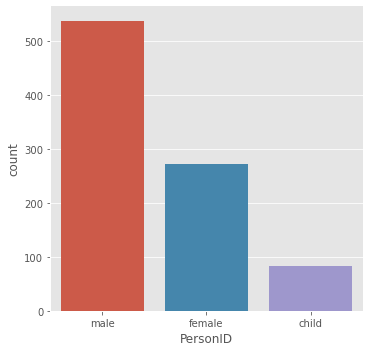

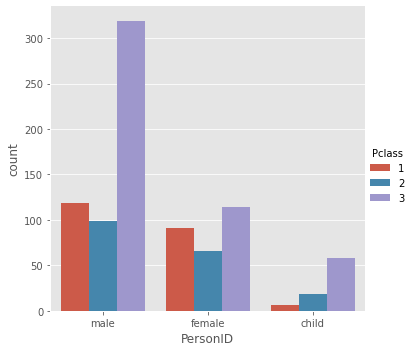

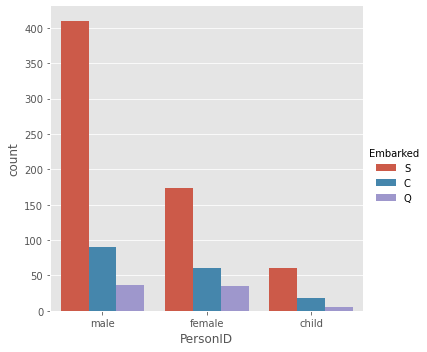

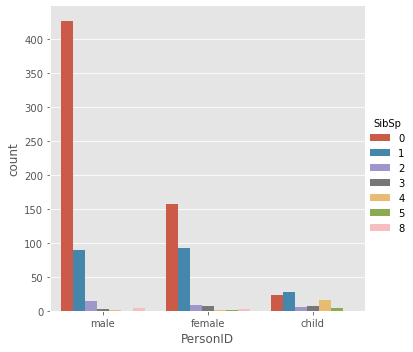

In [14]:
sns.catplot( 'PersonID', data= titanic_df, kind='count')
print(titanic_df['Pclass'].value_counts())
sns.catplot('PersonID', hue = 'Pclass', data = titanic_df, kind = 'count')
print(titanic_df['Embarked'].value_counts())
sns.catplot('PersonID', hue = 'Embarked', data = titanic_df, kind = 'count')
print(titanic_df['SibSp'].value_counts())
sns.catplot('PersonID', hue = 'SibSp', data = titanic_df, kind = 'count')
print(titanic_df['Parch'].value_counts())

c:\users\rishi\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked PersonID   Alone  
0      0         A/5 21171   7.2500        S     male  Family  
1      0          PC 17599  71.2833        C   female  Family  
2      0  STON/O2. 3101282   7.9250        S   female   Alone  
3      0            113803  53.1000        S   female  Family  


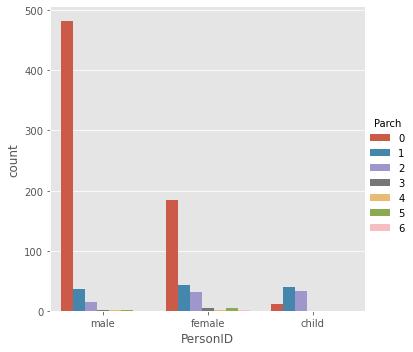

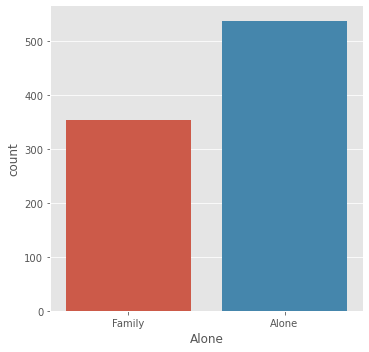

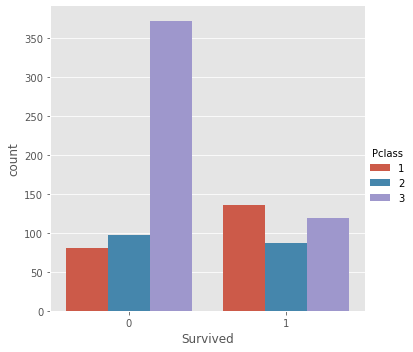

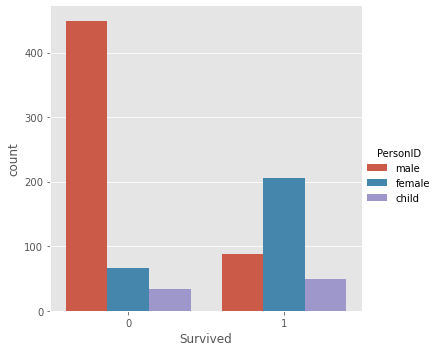

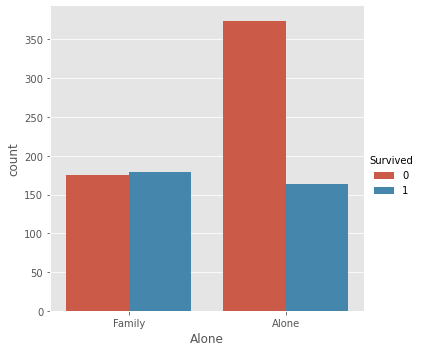

In [15]:
sns.catplot('PersonID', hue = 'Parch', data = titanic_df, kind = 'count')
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'
sns.catplot('Alone', data = titanic_df,  kind = 'count')
sns.catplot('Survived', hue = 'Pclass',   data = titanic_df, kind="count")
sns.catplot('Survived', hue = 'PersonID',   data = titanic_df, kind="count")
sns.catplot('Alone',hue='Survived',data=titanic_df,kind="count")
titanic_df.drop("Cabin" , axis = 1 , inplace = True )
print(titanic_df.head())
sex = pd.get_dummies(titanic_df["Sex"] , drop_first = True)
print(sex.head())
embark = pd.get_dummies(titanic_df["Embarked"], drop_first = True)
print(embark.head())
Pcl = pd.get_dummies(titanic_df["Pclass"] , drop_first = True)
print(Pcl.head())
titanic_df = pd.concat([titanic_df , sex , embark , Pcl] , axis = 1)
print(titanic_df.head())
titanic_df.drop(['Sex' , 'Pclass' , 'Embarked' , 'PassengerId' , 'Name' , 'Ticket'] , axis = 1 , inplace = True)
print(titanic_df.head())
titanic_df.drop(['PersonID','Alone'],axis=1,inplace=True)
print(titanic_df.head())
print(titanic_df.isnull().sum())